Dataset:

https://www.kaggle.com/competitions/titanic/data?select=train.csv

Data Dictionary:

survival	Survival	            0 = No, 1 = Yes

pclass	    Ticket class	        1 = 1st, 2 = 2nd, 3 = 3rd

sex	        Sex	                    M=Male, F=Female

Age	        Age in years	

sibsp	    Number of siblings / spouses aboard the Titanic	

parch	    Number of parents / children aboard the Titanic, some children had 0 if travelling with a nanny

ticket	    Ticket number	

fare	    Passenger fare	

cabin	    Cabin number	

embarked	Port of Embarkation	    S = Southampton, C = Cherbourg, Q = Queenstown

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# nearest next neighbours
from sklearn.neighbors import KNeighborsClassifier

# scaling and pre processing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

# training and testing data split
from sklearn.model_selection import train_test_split

# metrics
from sklearn import metrics, svm

# decision tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
# No y_train for the titanic dataset
# Do not use gender_submission.csv data as it's an example of the format submisions should look like
# use test.csv and train.csv, do not use test_train_split

# import datasets
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")


Basic exploratory data analysis

In [3]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Define variable and especially numeric variable names for use later

In [ ]:
allvars = ['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']
numericvars = ['PassengerId','Pclass','Age','SibSp','Parch','Fare','Survived']

train_data.info()

In [7]:
# check for duplicates
uniquetrainentries = train_data.drop_duplicates()
uniquetestentries = test_data.drop_duplicates()
uniquetrainentries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
uniquetestentries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


No duplicate entries.

Will need to do something about Name, Sex, Cabin and Embarked as those are objects
- Sex will definitely impact survival (women and children first)
- Embarked may also due to local wealth at that point?
- Name unlikely to impact, though family name may due to families evacuating together or to first class families having better access to lifeboats? Then again, common family names may create bias in the dataset between unrelated individuals
- Ticket unlikely to impact. At best will reflect class of cabin which is already inclued in "class". May try with or without this data.

In [9]:
# check for nulls
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Corroborates missing entries from info.

Why do some people have no cabin listed? Was that lost information or so some people sleep on the floor / deck? 

Can't drop nulls as there are too many. Setting all null cabins to the mean or mode will bias the dataset too much. 
Probably best to ignore cabin in the analysis, at least initially.

Probably need to drop null ages as mean or mode will bias the dataset too much, especially as "women and children first" will mean more young people will be rescued than old. Can add back in later for a retest, time permitting.

In [11]:
# Check numbers of types of string objects
for i in train_data:
    data_type =  train_data[i].dtype
    if data_type == "object":
        value_count = train_data[i].value_counts()
        print("\n",value_count)


 Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

 Sex
male      577
female    314
Name: count, dtype: int64

 Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Len

Why do some entries have two people listed on a line? Are they the same person?

Dataset biased towards Males 50% more M than F

Dataset biased towards Southhampton and against Queenstown

Tickets seem to cover multiple passengers (one for a family?) but have no obvious format so unlikely to correlate to class of ticket or time of purchase (e.g. people buying first may have been the richest)

Cabins seem to have duplicates - one cabin per couple or family seems sensible.

In [13]:
# basic stats on the numeric data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Did some people really get a free ticket? Hard to believe fares would be zero, unless crew are included.

Age looks continuous

PassengerId unlikely to impact data, unless is reflects wealth through keeness to purchase!

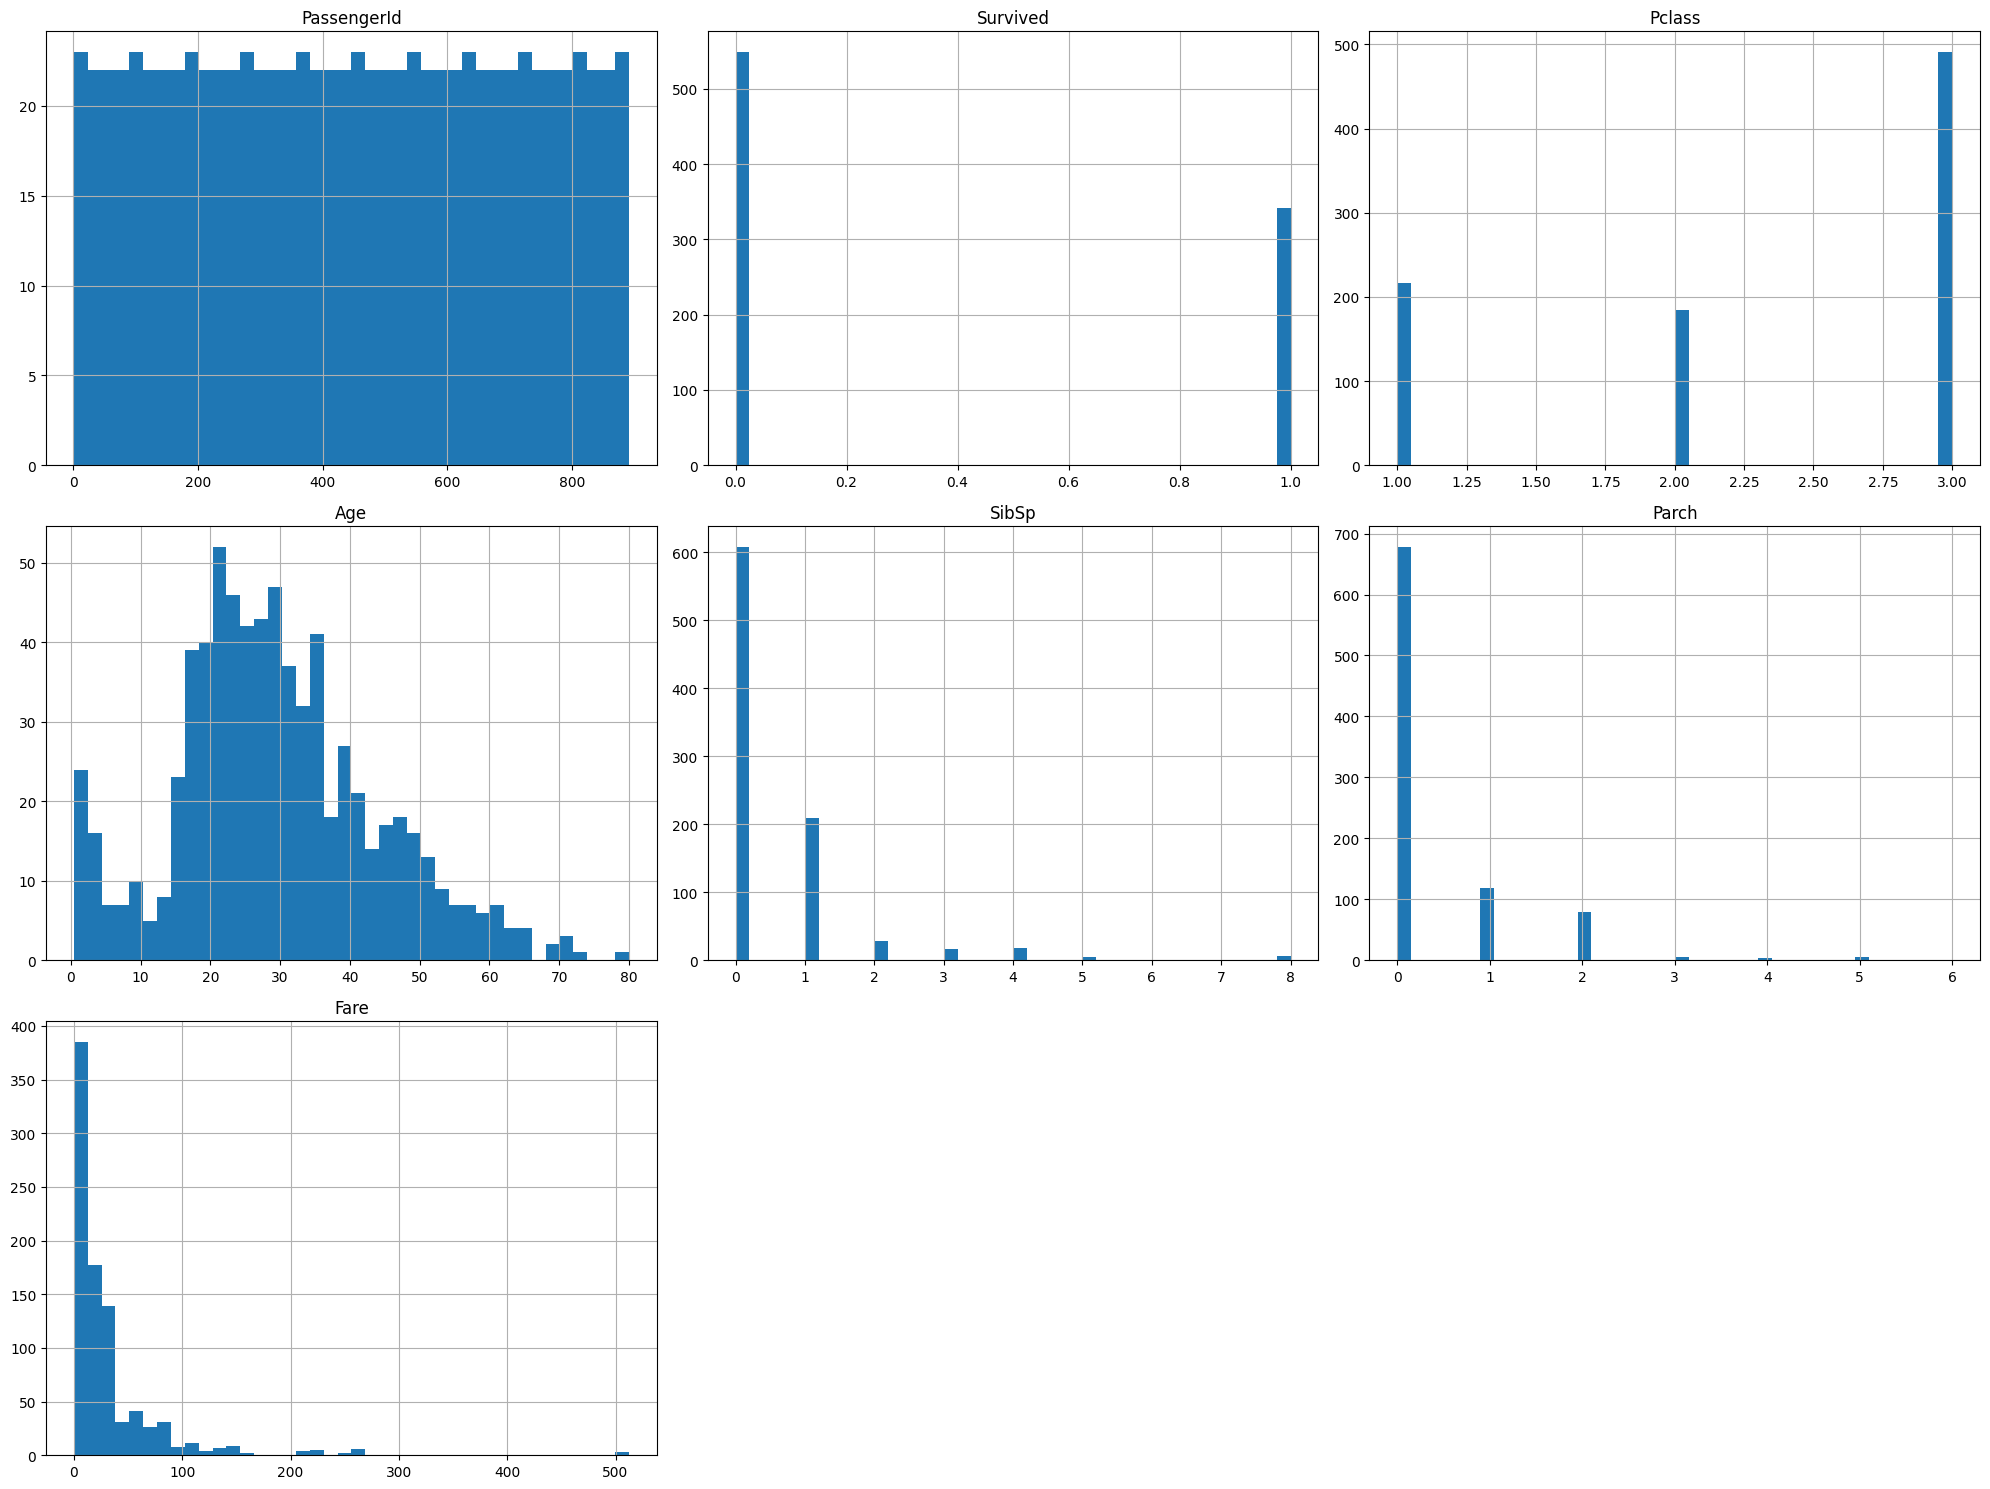

In [15]:
# histogram all numeric data
train_data.hist(bins=40, figsize=(20, 15))
plt.tight_layout()
filename = 'histogram-raw.jpeg'
plt.savefig(filename, format = 'jpeg')

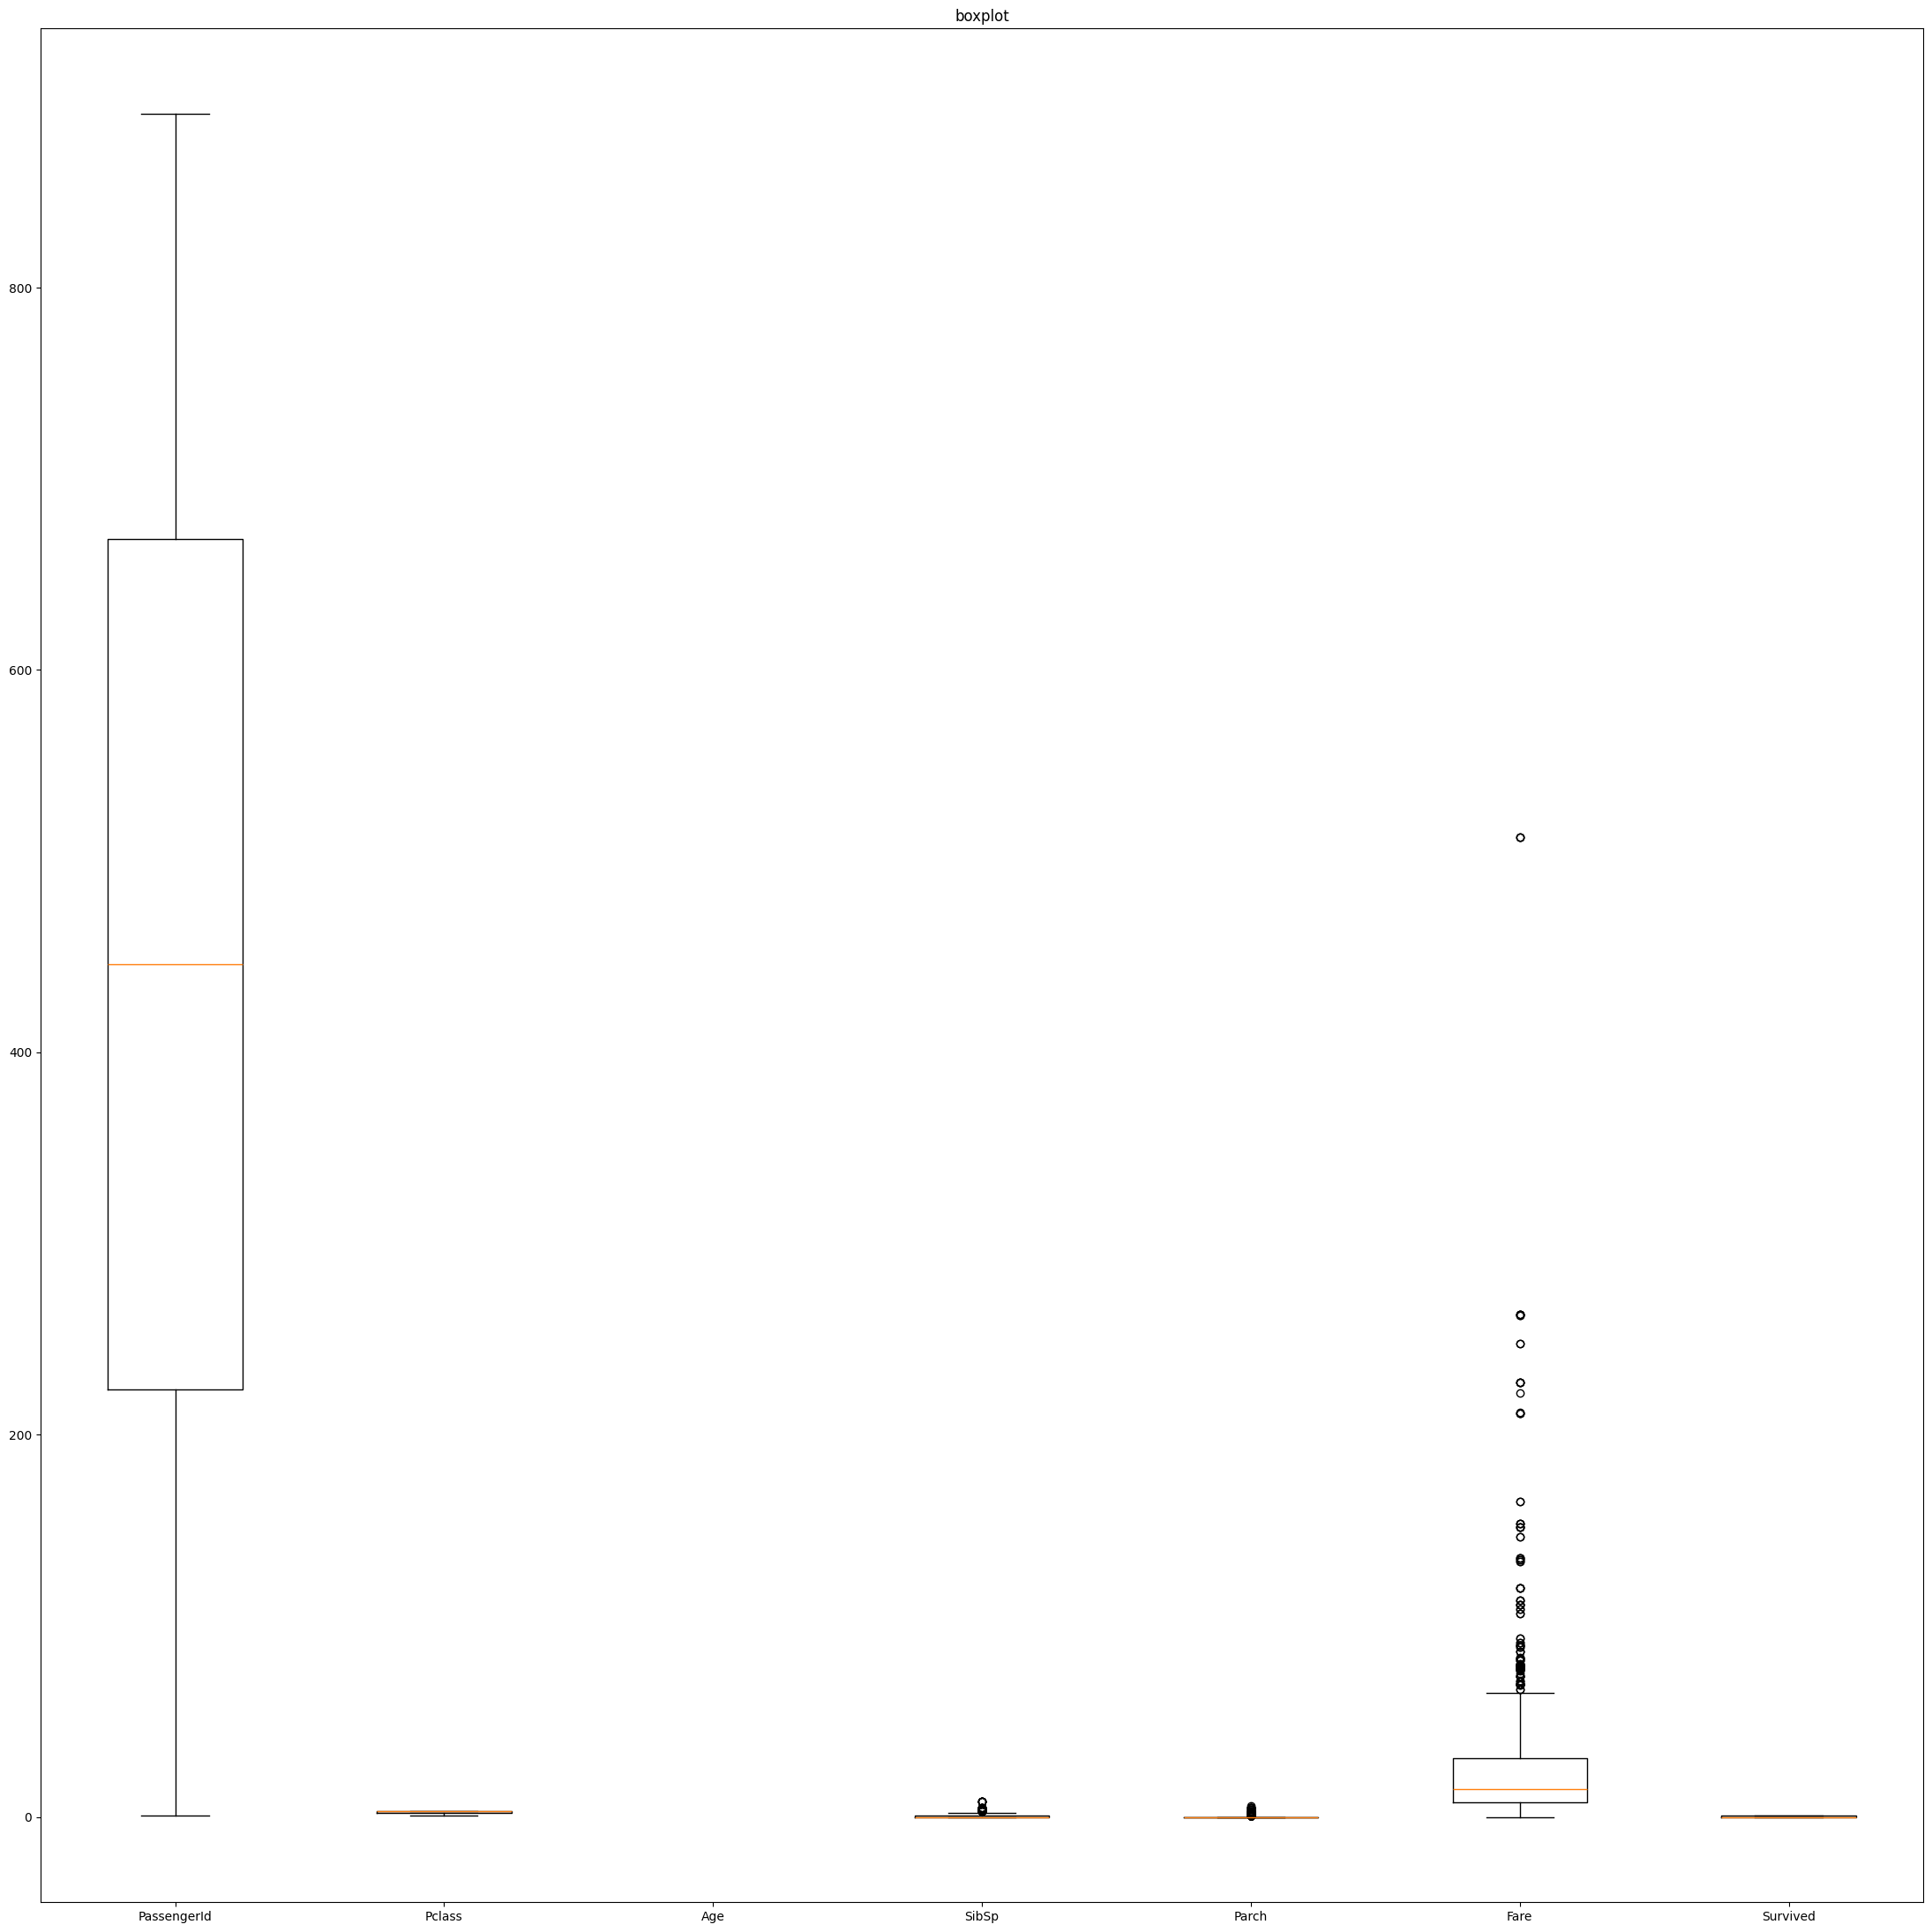

In [16]:
# boxplot to look at essential characteristics (Age doesn't work due to nulls)
plt.figure(figsize=(22,22))

# boxplots can't deal with non ints and floats, so get a new df without those data types
dfboxplotdata = train_data[numericvars]
plt.boxplot(dfboxplotdata, tick_labels = numericvars)
plt.title('boxplot')
plt.tight_layout()
filename = 'boxplot-raw.jpeg'
plt.savefig(filename, format = 'jpeg')

Fare has a lot of outliers.
Some fares are listed as zero.

In [17]:
# Correlations
corr_matrix = train_data[numericvars].corr()
corr_matrix

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.005007
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.005007,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000


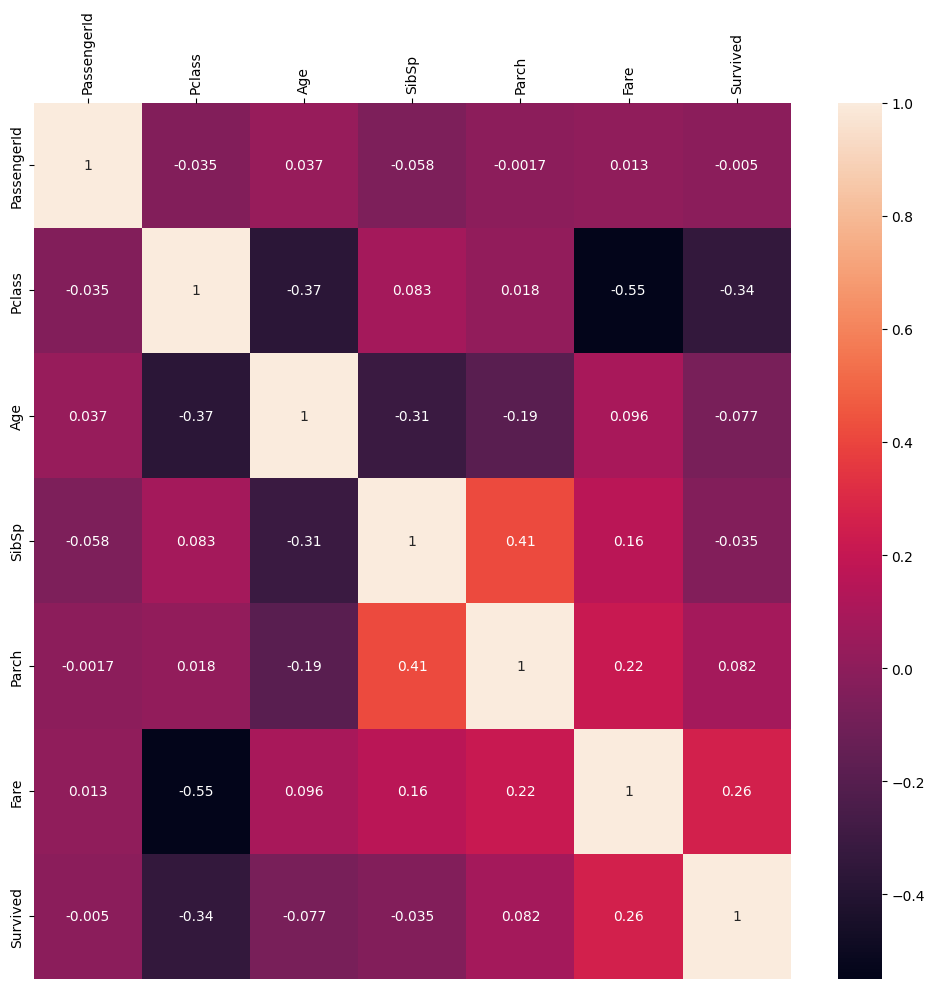

In [18]:
## visualize the correlation matrix
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_matrix, annot=True)
# Move x-axis tick labels to the top
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.tight_layout()
filename = 'corrmatrix-raw.jpeg'
plt.savefig(filename, format = 'jpeg')

Will definitely drop PassengerId due to extremely low correlation

Strongest correlations with Survived are Pclass (reduces the lower the class) and Fare (increases with fare paid), but strongest correlation is between Fare and Pclass both of which correlate with wealth and prestige anyway, so will the dataset be too biased when using two variables that mean much the same thing?

Strong correlation between parent/child and sibling/spouse, which is to be expected as children will be travelling with their parents (Parch) and the parents will be spouses (SibSp).

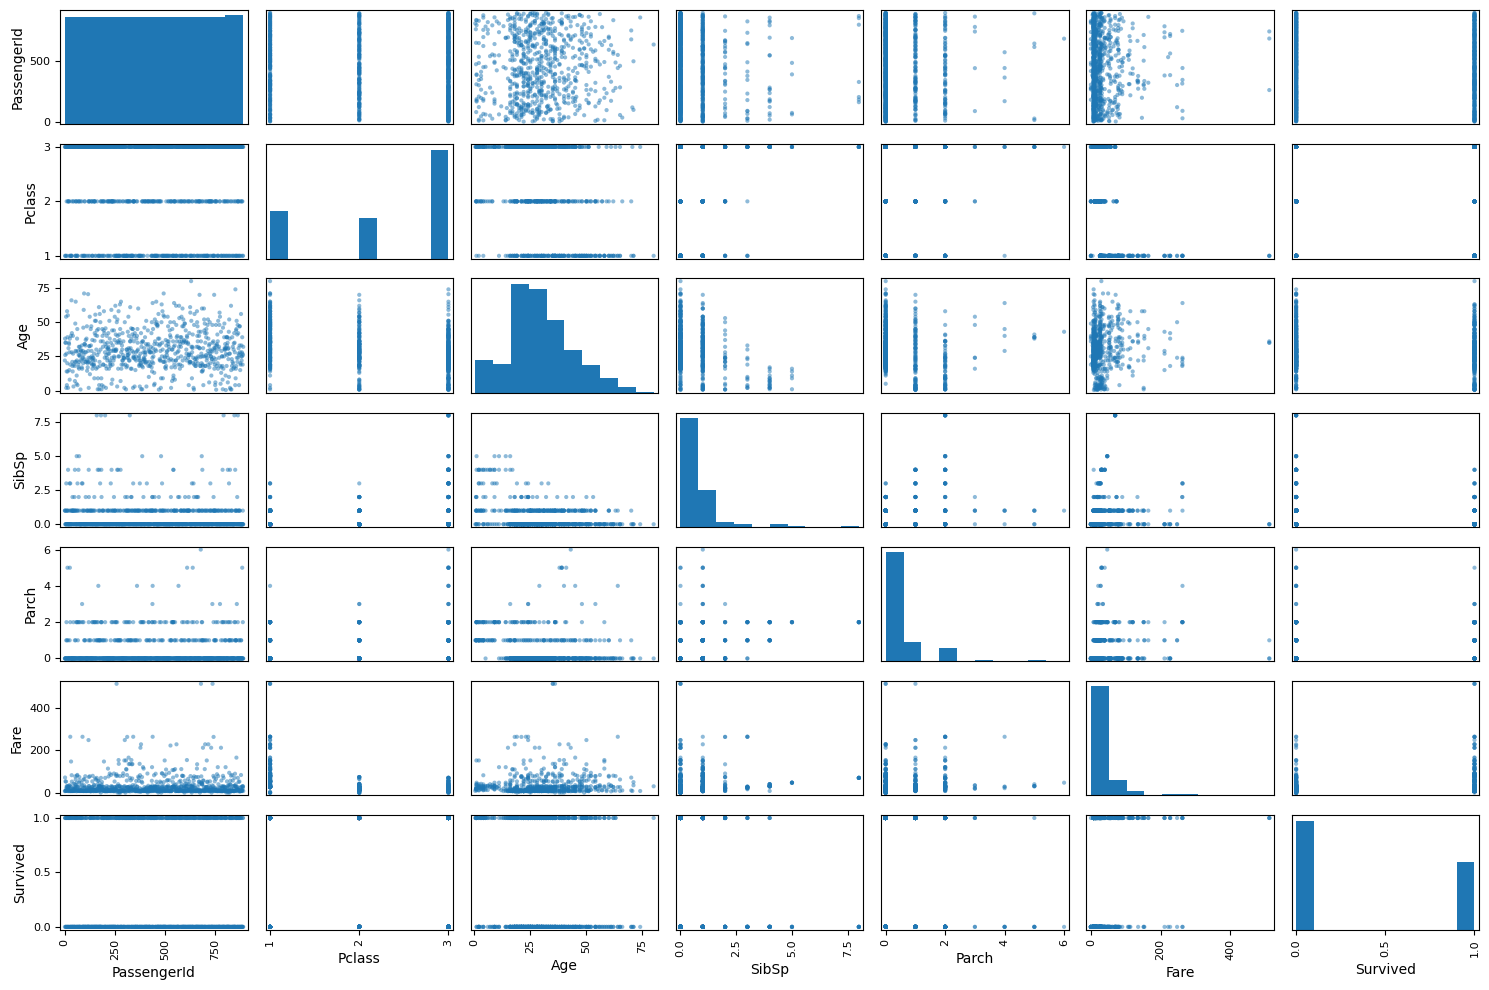

In [19]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_data[numericvars], figsize=(15,10))
plt.tight_layout()
filename = 'scattermatrices-raw.jpeg'
plt.savefig(filename, format = 'jpeg')

In [20]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [21]:
# This was a good idea, but had to process data in excel to get a decent bar chart

survivors = train_data[(train_data['Survived']>0)]
survivors_by_Embarked = survivors.groupby(['Embarked']).count() / train_data.groupby(['Embarked']).count()
survivors_by_Sex = survivors.groupby(['Sex']).count() / train_data.groupby(['Sex']).count()
survivors_by_Pclass = survivors.groupby(['Pclass']).count() / train_data.groupby(['Pclass']).count()
survivors_by_Parch = survivors.groupby(['Parch']).count() / train_data.groupby(['Parch']).count()
survivors_by_SibSp = survivors.groupby(['SibSp']).count() / train_data.groupby(['SibSp']).count()

In [22]:
survivors

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [23]:
survivors_by_Embarked['PassengerId']


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: PassengerId, dtype: float64

In [24]:
survivors_by_Sex['PassengerId']

Sex
female    0.742038
male      0.188908
Name: PassengerId, dtype: float64

In [25]:
survivors_by_Pclass['PassengerId']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: PassengerId, dtype: float64

In [26]:
survivors_by_Parch['PassengerId']

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4         NaN
5    0.200000
6         NaN
Name: PassengerId, dtype: float64

In [27]:
survivors_by_SibSp['PassengerId']

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5         NaN
8         NaN
Name: PassengerId, dtype: float64

Survivability by attribute

C,0.553571

Q,0.389610

S,0.336957

female,0.742038

male,0.188908

1,0.629630

2,0.472826

3,0.242363

0,0.343658

1,0.550847

2,0.500000

3,0.600000

5,0.200000

0,0.345395

1,0.535885

2,0.464286

3,0.250000

4,0.166667

In [ ]:
# Clean the dataset
label_enc = LabelEncoder()
train_data_enc = train_data
test_data_enc = test_data

# Convert sex to binary
train_data_enc['SexBinary'] = label_enc.fit_transform(train_data_enc['Sex'])
test_data_enc['SexBinary'] = label_enc.fit_transform(test_data_enc['Sex'])

# Convert Embarked to numeric
#  actual route was Southampton to Cherbourg to Queensland to New York, so convert to numeric in embarkation order
embark_dict = {'S':1, 'C':2, 'Q':3}

for item in embark_dict:
    train_data_enc.loc[train_data_enc['Embarked'] == item, "EmbarkedEncoded"] = embark_dict[item]
    test_data_enc.loc[test_data_enc['Embarked'] == item, "EmbarkedEncoded"] = embark_dict[item] 

# Do I need to deal with zero fares? Not sure as the zero entries don't seem to impact the scatter graphs and data is biased towards low fares anyway, 
# with a large number of high outliers.

# Drop Cabin due to number of nulls, PassengerId, Name and Ticket for low correlation and the unencoded Sex, Embarked
independentvars = ['Pclass','SexBinary','Age','SibSp','Parch','Fare','EmbarkedEncoded']
subsetofvars = ['Pclass','SexBinary','Age','SibSp','Parch','Fare','EmbarkedEncoded','Survived']

subsetoftrainingdata = train_data_enc[subsetofvars]

x_train = subsetoftrainingdata[independentvars]
x_test = test_data_enc[independentvars]

y_train = subsetoftrainingdata['Survived']

x_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           891 non-null    int64  
 1   SexBinary        891 non-null    int64  
 2   Age              714 non-null    float64
 3   SibSp            891 non-null    int64  
 4   Parch            891 non-null    int64  
 5   Fare             891 non-null    float64
 6   EmbarkedEncoded  889 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 48.9 KB


In [30]:
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [31]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           418 non-null    int64  
 1   SexBinary        418 non-null    int64  
 2   Age              332 non-null    float64
 3   SibSp            418 non-null    int64  
 4   Parch            418 non-null    int64  
 5   Fare             417 non-null    float64
 6   EmbarkedEncoded  418 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 23.0 KB


Still have 2 null EmbarkedEncoded and 177 null Ages in the training data

In [32]:
# recheck correlations
corr_matrix_enc = train_data_enc[independentvars].corr()
#corr_matrix_enc = x_train.corr()
corr_matrix_enc

,Pclass,SexBinary,Age,SibSp,Parch,Fare,EmbarkedEncoded
Pclass,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835
SexBinary,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,-0.118593
Age,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.063462
EmbarkedEncoded,0.043835,-0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


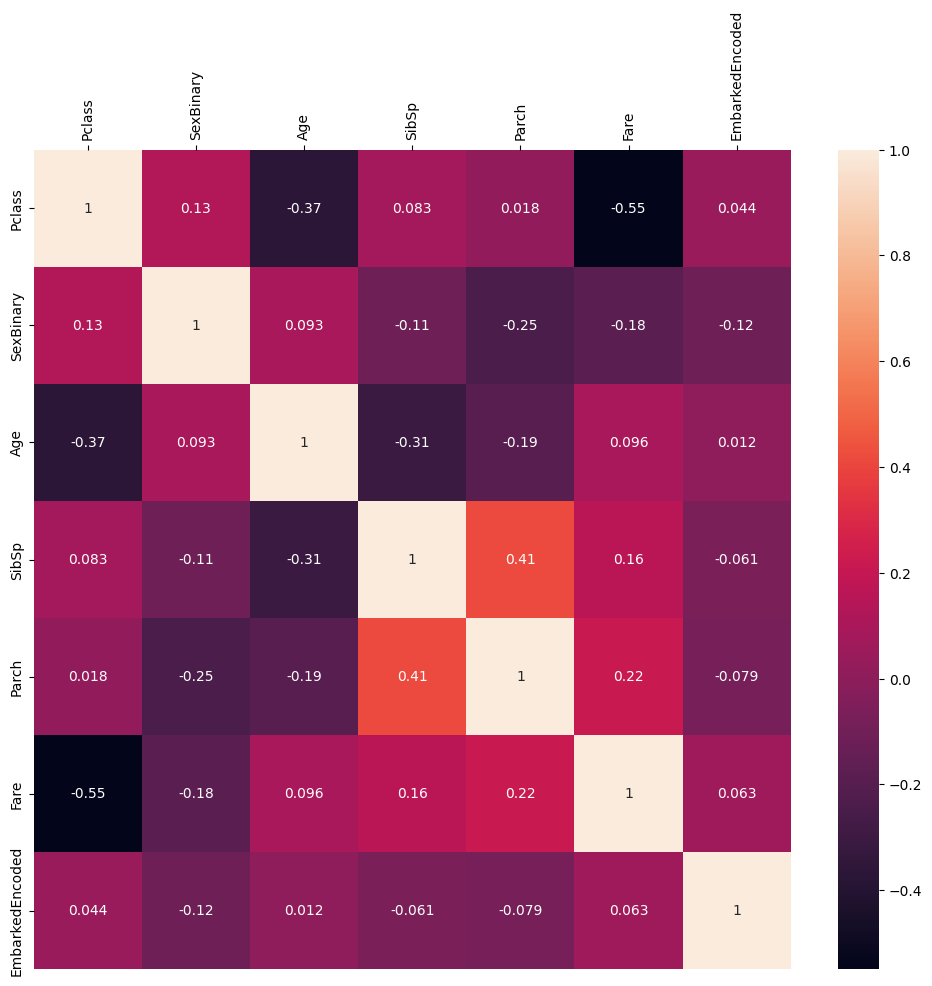

In [33]:
## visualize the correlation matrix
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_matrix_enc, annot=True)
# Move x-axis tick labels to the top
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.tight_layout()
filename = 'corrmatrix-clean.jpeg'
plt.savefig(filename, format = 'jpeg')

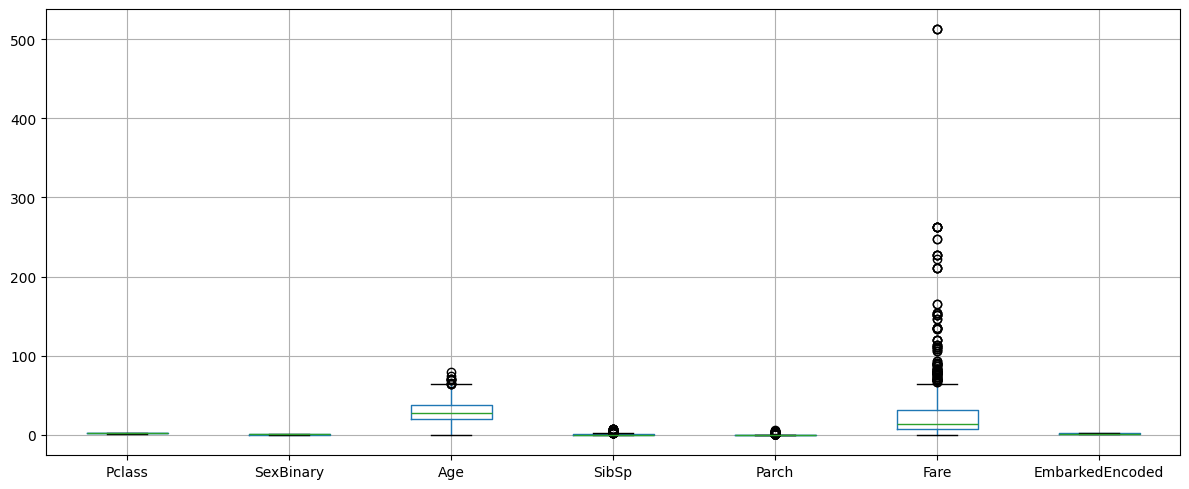

In [34]:
x_train.boxplot(figsize=(12,5))
plt.tight_layout()
filename = 'boxplot-clean.jpeg'
plt.savefig(filename, format = 'jpeg')

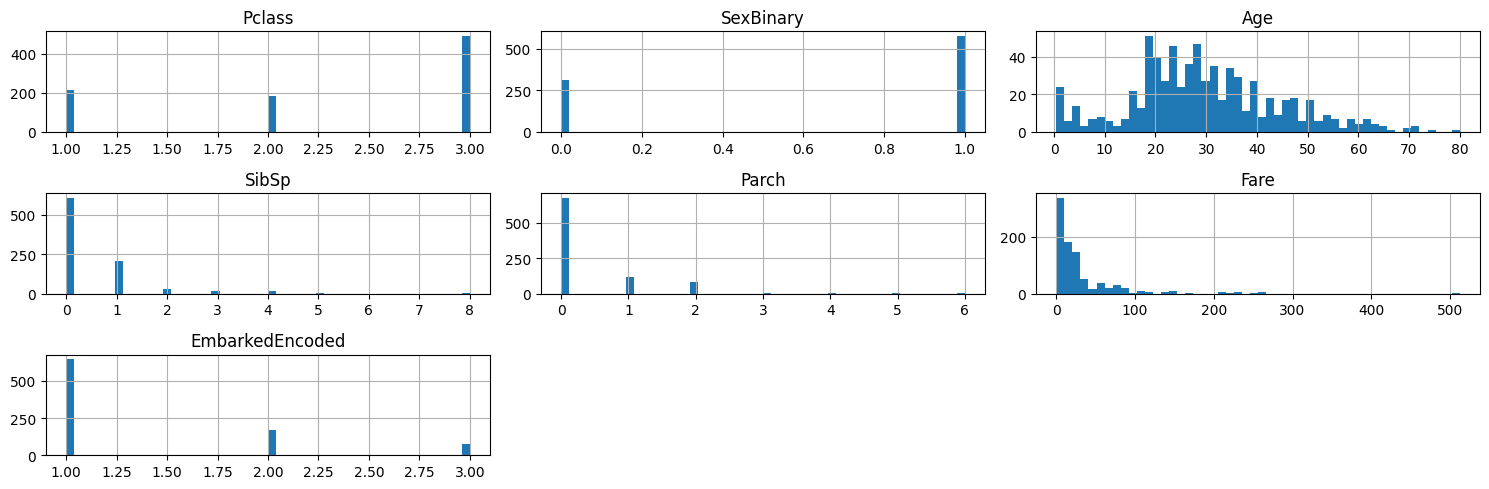

In [35]:
x_train.hist(bins = 50,figsize=(15,5))
plt.tight_layout()
filename = 'histogram-clean.jpeg'
plt.savefig(filename, format = 'jpeg')

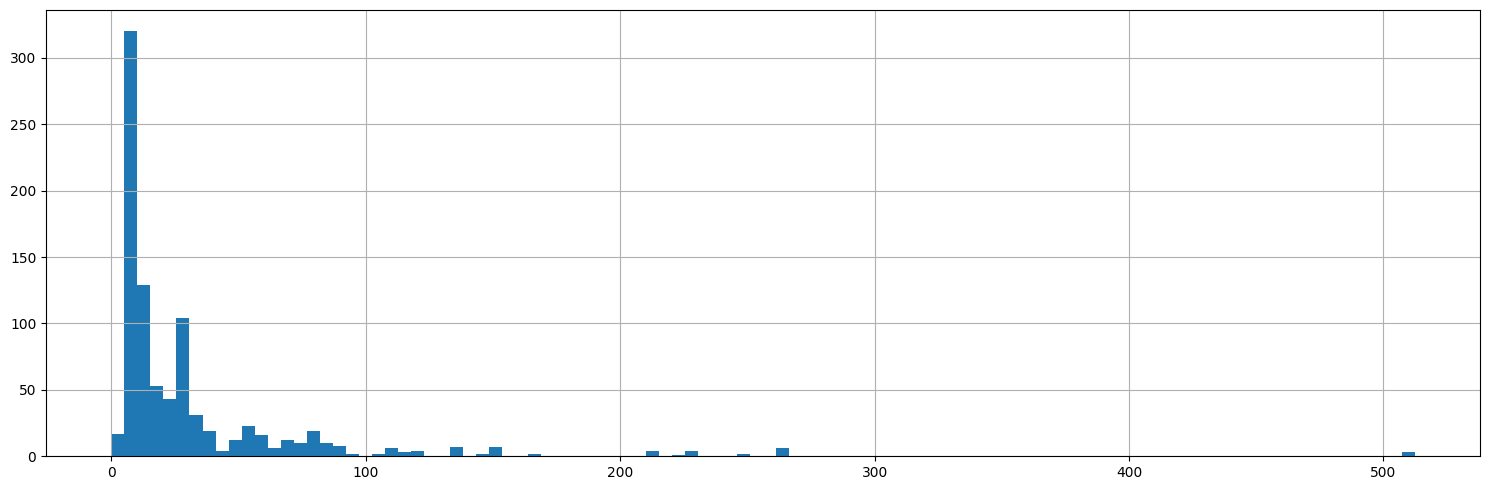

In [36]:
x_train['Fare'].hist(bins = 100,figsize=(15,5))
plt.tight_layout()

In [37]:
# Decision Tree
decision_tree_gini = DecisionTreeClassifier()

# using entropy criterion
decision_tree_ent = DecisionTreeClassifier(criterion='entropy')

# use a max depth (max number of decisions)
decision_tree_depth = DecisionTreeClassifier(max_depth=3)

# train
decision_tree_gini.fit(x_train, y_train)
decision_tree_ent.fit(x_train, y_train)
decision_tree_depth.fit(x_train, y_train)

# predict training
y_pred_train_gini = decision_tree_gini.predict(x_train)
y_pred_train_ent = decision_tree_ent.predict(x_train)
y_pred_train_depth = decision_tree_depth.predict(x_train)

# measure accuracy by checking predicted y train vs actual y train
print("Accuracy of gini",metrics.accuracy_score(y_train,y_pred_train_gini))
print("Accuracy of entropy",metrics.accuracy_score(y_train,y_pred_train_ent))
print("Accuracy of depth",metrics.accuracy_score(y_train,y_pred_train_depth))

# predict testing
y_pred_test_gini = decision_tree_gini.predict(x_test)
y_pred_test_ent = decision_tree_ent.predict(x_test)
y_pred_test_depth = decision_tree_depth.predict(x_test)


Accuracy of gini 0.9820426487093153
Accuracy of entropy 0.9820426487093153
Accuracy of depth 0.8271604938271605


In [38]:
dfDecisionTreeTrain = pd.DataFrame({'Actual': y_train, 'Gini': y_pred_train_gini,'Entropy': y_pred_train_ent,'Depth=3': y_pred_train_depth})
dfDecisionTreeTrain

,Actual,Gini,Entropy,Depth=3
0,0,0,0,0
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
886,0,0,0,0
887,1,1,1,1
888,0,0,0,0
889,1,1,1,0


In [39]:

dfDecisionTreeTest = pd.DataFrame({'Gini': y_pred_test_gini,'Entropy': y_pred_test_ent,'Depth=3': y_pred_test_depth})
dfDecisionTreeTest

,Gini,Entropy,Depth=3
0,0,0,0
1,0,0,1
2,1,1,0
3,1,1,0
4,0,0,1
...,...,...,...
413,0,0,0
414,1,1,1
415,0,0,0
416,0,0,0


In [40]:
dfDecisionTreeTest.sum()

Gini       165
Entropy    155
Depth=3    150
dtype: int64

In [42]:
# SVM
clflinear = svm.SVC(kernel='linear')
clfsigmoid = svm.SVC(kernel='sigmoid')
clfrbf = svm.SVC(kernel='rbf')

# Does not like nulls and as are in a few Age and embarkation entries, drop them for this test.
clf_train_data_enc = train_data_enc
clf_train_data_enc = clf_train_data_enc.drop(['Cabin', 'PassengerId','Ticket','Name','Sex','Embarked'], axis=1)
clf_train_data_enc.dropna(inplace=True) 

clf_test_data_enc = test_data_enc
clf_test_data_enc = clf_test_data_enc.drop(['Cabin', 'PassengerId','Ticket','Name','Sex','Embarked'], axis=1)
clf_test_data_enc.dropna(inplace=True) 


In [43]:
x_train_clf = clf_train_data_enc[independentvars]
y_train_clf = clf_train_data_enc['Survived']
x_test_clf = clf_test_data_enc[independentvars]

In [44]:
train_data_enc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexBinary,EmbarkedEncoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,2.0


In [45]:
clf_train_data_enc

,Survived,Pclass,Age,SibSp,Parch,Fare,SexBinary,EmbarkedEncoded
0,0,3,22.0,1,0,7.2500,1,1.0
1,1,1,38.0,1,0,71.2833,0,2.0
2,1,3,26.0,0,0,7.9250,0,1.0
3,1,1,35.0,1,0,53.1000,0,1.0
4,0,3,35.0,0,0,8.0500,1,1.0
...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,3.0
886,0,2,27.0,0,0,13.0000,1,1.0
887,1,1,19.0,0,0,30.0000,0,1.0
889,1,1,26.0,0,0,30.0000,1,2.0


In [46]:
x_train_clf

,Pclass,SexBinary,Age,SibSp,Parch,Fare,EmbarkedEncoded
0,3,1,22.0,1,0,7.2500,1.0
1,1,0,38.0,1,0,71.2833,2.0
2,3,0,26.0,0,0,7.9250,1.0
3,1,0,35.0,1,0,53.1000,1.0
4,3,1,35.0,0,0,8.0500,1.0
...,...,...,...,...,...,...,...
885,3,0,39.0,0,5,29.1250,3.0
886,2,1,27.0,0,0,13.0000,1.0
887,1,0,19.0,0,0,30.0000,1.0
889,1,1,26.0,0,0,30.0000,2.0


In [47]:
y_train_clf

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [48]:
test_data_enc

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexBinary,EmbarkedEncoded
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,3.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,1.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,2.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,1.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,1.0


In [49]:
clf_test_data_enc

,Pclass,Age,SibSp,Parch,Fare,SexBinary,EmbarkedEncoded
0,3,34.5,0,0,7.8292,1,3.0
1,3,47.0,1,0,7.0000,0,1.0
2,2,62.0,0,0,9.6875,1,3.0
3,3,27.0,0,0,8.6625,1,1.0
4,3,22.0,1,1,12.2875,0,1.0
...,...,...,...,...,...,...,...
409,3,3.0,1,1,13.7750,0,1.0
411,1,37.0,1,0,90.0000,0,3.0
412,3,28.0,0,0,7.7750,0,1.0
414,1,39.0,0,0,108.9000,0,2.0


In [50]:
x_test_clf

,Pclass,SexBinary,Age,SibSp,Parch,Fare,EmbarkedEncoded
0,3,1,34.5,0,0,7.8292,3.0
1,3,0,47.0,1,0,7.0000,1.0
2,2,1,62.0,0,0,9.6875,3.0
3,3,1,27.0,0,0,8.6625,1.0
4,3,0,22.0,1,1,12.2875,1.0
...,...,...,...,...,...,...,...
409,3,0,3.0,1,1,13.7750,1.0
411,1,0,37.0,1,0,90.0000,3.0
412,3,0,28.0,0,0,7.7750,1.0
414,1,0,39.0,0,0,108.9000,2.0


In [51]:
# train
clflinear.fit(x_train_clf,y_train_clf)
clfsigmoid.fit(x_train_clf,y_train_clf)
clfrbf.fit(x_train_clf,y_train_clf)

# predict training
y_pred_train_lin = clflinear.predict(x_train_clf)
y_pred_train_sig = clfsigmoid.predict(x_train_clf)
y_pred_train_rbf = clfrbf.predict(x_train_clf)

## measure accuracy
print("Accuracy of linear: ",metrics.accuracy_score(y_train_clf,y_pred_train_lin))
print("Accuracy of sigmoid: ",metrics.accuracy_score(y_train_clf,y_pred_train_sig))
print("Accuracy of rbf: ",metrics.accuracy_score(y_train_clf,y_pred_train_rbf))

# predict testing
y_pred_test_lin = clflinear.predict(x_test_clf)
y_pred_test_sig = clfsigmoid.predict(x_test_clf)
y_pred_test_rbf = clfrbf.predict(x_test_clf)


Accuracy of linear:  0.7794943820224719
Accuracy of sigmoid:  0.577247191011236
Accuracy of rbf:  0.6769662921348315


In [52]:
dfSVMTrain = pd.DataFrame({'Actual': y_train_clf, 'Linear':y_pred_train_lin,'Sigmoid':y_pred_train_sig,'RBF':y_pred_train_rbf})
dfSVMTrain

,Actual,Linear,Sigmoid,RBF
0,0,0,0,0
1,1,1,0,1
2,1,1,0,0
3,1,1,1,1
4,0,0,0,0
...,...,...,...,...
885,0,1,1,0
886,0,0,0,0
887,1,1,1,0
889,1,0,1,0


In [53]:
dfSVMTest = pd.DataFrame({'Linear':y_pred_test_lin,'Sigmoid':y_pred_test_sig,'RBF':y_pred_test_rbf})
dfSVMTest

,Linear,Sigmoid,RBF
0,0,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,1,0,0
...,...,...,...
326,1,1,0
327,1,0,1
328,1,0,0
329,1,0,1


In [55]:
dfSVMTest.sum()

Linear     127
Sigmoid    131
RBF         75
dtype: int64

In [56]:
# KNN
# scale the data
sc = StandardScaler()
mms = MinMaxScaler()

x_train_knn = x_train_clf
y_train_knn = y_train_clf
x_test_knn = x_test_clf

sc.fit_transform(x_train_knn)
sc.transform(x_test_knn)

array([[ 0.90859974,  0.75613751,  0.33542709, ..., -0.50678737,
        -0.50543127,  3.33611536],
       [ 0.90859974, -1.32251077,  1.19852274, ..., -0.50678737,
        -0.52110569, -0.50122573],
       [-0.28719141,  0.75613751,  2.23423752, ..., -0.50678737,
        -0.47030369,  3.33611536],
       ...,
       [ 0.90859974, -1.32251077, -0.11338265, ..., -0.50678737,
        -0.50645581, -0.50122573],
       [-1.48298257, -1.32251077,  0.64614153, ..., -0.50678737,
         1.40511717,  1.41744481],
       [ 0.90859974,  0.75613751,  0.6116177 , ..., -0.50678737,
        -0.51637992, -0.50122573]], shape=(331, 7))

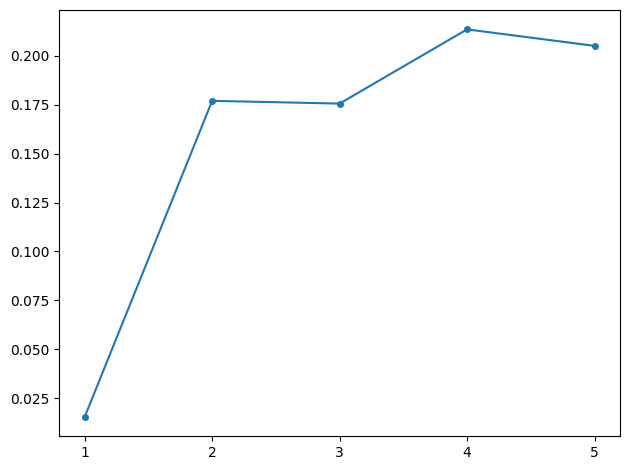

In [57]:

# what is the best k value using standard scaler?
error_rate = []
maxnum = x_train_knn['SexBinary'].count()
maxnum = 6
#myaxis = maxnum

# loop around possible k values from 1 to number of data points in x_train, only using odd values
for i in range(1,maxnum,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_knn, y_train_knn)
    knn_pred = knn.predict(x_train_knn)
    error_rate.append(np.mean(knn_pred != y_train_knn))

fig, ax = plt.subplots()
ax.set_xticks(np.arange(1,maxnum,1))
plt.plot(range(1,maxnum,1),error_rate, marker = 'o', markersize = 4)
plt.tight_layout()

#filename = 'knn-long-sc.jpeg'
filename = 'knn-short-sc.jpeg'
plt.savefig(filename, format = 'jpeg')


In [58]:
# build the model knn = 2 as this gives the lowest error rate (other than 3, but there are no undead passengers)
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train_knn, y_train_knn)

# predict training data
knn_pred = knn.predict(x_train_knn)
print("Accuracy of knn: ",metrics.accuracy_score(y_train_knn,knn_pred))


Accuracy of knn:  0.8230337078651685


In [59]:
# Now do min-max scaler

x_train_knn = x_train_clf
y_train_knn = y_train_clf
x_test_knn = x_test_clf

mms.fit_transform(x_train_knn)
mms.transform(x_test_knn)

array([[1.        , 1.        , 0.4282483 , ..., 0.        , 0.01528158,
        1.        ],
       [1.        , 0.        , 0.58532295, ..., 0.        , 0.01366309,
        0.        ],
       [0.5       , 1.        , 0.77381252, ..., 0.        , 0.01890874,
        1.        ],
       ...,
       [1.        , 0.        , 0.34656949, ..., 0.        , 0.01517579,
        0.        ],
       [0.        , 0.        , 0.48479517, ..., 0.        , 0.21255864,
        0.5       ],
       [1.        , 1.        , 0.47851219, ..., 0.        , 0.01415106,
        0.        ]], shape=(331, 7))

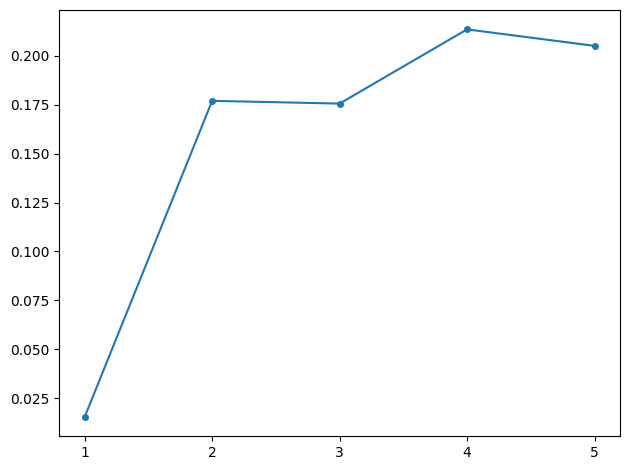

In [60]:
# what is the best k value using min-max scaler?
error_rate = []
maxnum = x_train_knn['SexBinary'].count()
maxnum = 6
#myaxis = maxnum

# loop around possible k values from 1 to number of data points in x_train, only using odd values
for i in range(1,maxnum,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_knn, y_train_knn)
    knn_pred = knn.predict(x_train_knn)
    error_rate.append(np.mean(knn_pred != y_train_knn))

fig, ax = plt.subplots()
ax.set_xticks(np.arange(1,maxnum,1))
plt.plot(range(1,maxnum,1),error_rate, marker = 'o', markersize = 4)
plt.tight_layout()

#filename = 'knn-long-mms.jpeg'
filename = 'knn-short-mms.jpeg'
plt.savefig(filename, format = 'jpeg')

In [61]:
# build the model knn = 2 as this gives the lowest error rate
mmsknn = KNeighborsClassifier(n_neighbors = 2)
mmsknn.fit(x_train_knn, y_train_knn)

# predict training data
mms_knn_pred = mmsknn.predict(x_train_knn)
print("Accuracy of knn: ",metrics.accuracy_score(y_train_knn,mms_knn_pred))


Accuracy of knn:  0.8230337078651685


In [62]:
dfKNNTrain = pd.DataFrame({'Actual': y_train_knn, 'KNN':knn_pred})
dfKNNTrain

,Actual,KNN
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
885,0,0
886,0,0
887,1,1
889,1,1


In [63]:
# predict test data
y_pred_test_knn = knn.predict(x_test_knn)

dfKNNTest = pd.DataFrame({'KNN':y_pred_test_knn})
dfKNNTest

,KNN
0,0
1,0
2,0
3,1
4,0
...,...
326,1
327,1
328,0
329,1


In [64]:
dfKNNTest.sum()

KNN    125
dtype: int64